# Python Project : ObesityDataSet_raw_and_data_sinthetic

### Quentin Berthault & Aref Bitar  DIA 2

## Imports librairies

In [70]:
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Import data

In [73]:
data=pd.read_csv('https://github.com/Tintintin1234/Projet-Python-Data-Analyse/blob/b7c48827d8801d2fcb6ddb900a7682c7ef093075/ObesityDataSet_raw_and_data_sinthetic.csv?raw=true')
#data=pd.read_csv('C:/Users/quent/Desktop/Projet Data Python/ObesityDataSet_raw_and_data_sinthetic.csv')

df=data.copy()

## Rename columns with more explicit words

In [75]:
data.columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [74]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


## View of some characteristic about data

In [42]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
print(data.shape)

(2111, 17)


In [44]:
data.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [83]:
print("NA & null by columns : \n")
for i in data.columns:
    print(i +' : \t', data[i].isna().sum(),'NA  ', data[i].isnull().sum(),'null')

NA & null by columns : 

Gender : 	 0 NA   0 null
Age : 	 0 NA   0 null
Height : 	 0 NA   0 null
Weight : 	 0 NA   0 null
family_history_with_overweight : 	 0 NA   0 null
Frequent consumption of high caloric food : 	 0 NA   0 null
Frequency of consumption of vegetables : 	 0 NA   0 null
Number of main meals : 	 0 NA   0 null
Consumption of food between meals : 	 0 NA   0 null
Smoke : 	 0 NA   0 null
Consumption of water daily : 	 0 NA   0 null
Calories consumption monitoring : 	 0 NA   0 null
Physical activity frequency : 	 0 NA   0 null
Time using technology devices : 	 0 NA   0 null
Consumption of alcohol : 	 0 NA   0 null
Transportation used : 	 0 NA   0 null
Obesity : 	 0 NA   0 null


In [ ]:
homme=data[data['Gender']=='Male']
femme=data[data['Gender']=='Female']


C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\quent\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


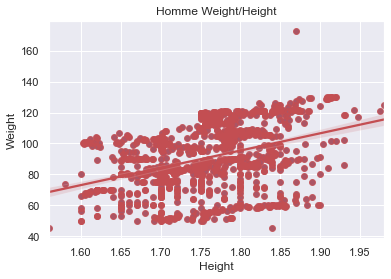

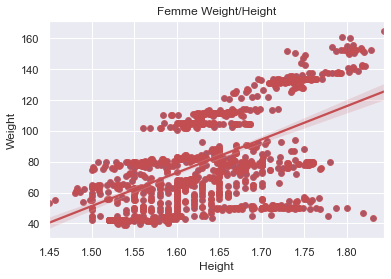

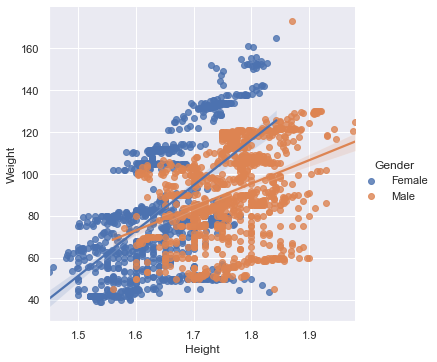

In [62]:
ax1 = homme.plot.scatter(x='Height',y='Weight', color='b')
sns.regplot(homme.Height, homme.Weight, color='r')
plt.title("Homme Weight/Height")
ax2= femme.plot.scatter(x='Height',y='Weight')
sns.regplot(femme.Height, femme.Weight, color='r')
plt.title("Femme Weight/Height")
ax3= sns.lmplot(x="Height", y="Weight", hue="Gender", data=df)
ax3.set_axis_labels("Height", "Weight")

In [25]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


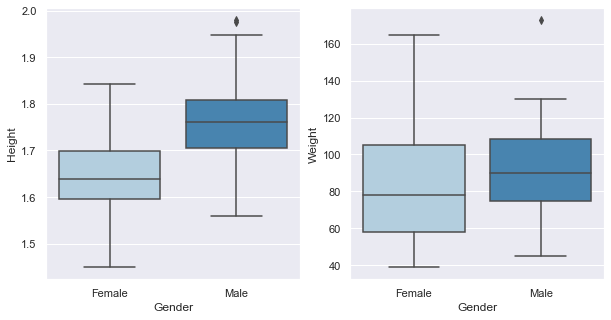

In [26]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', palette="Blues", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight',palette="Blues", data=data)

In [27]:
for i in data.select_dtypes('object'):
    print(f'{i: <35} {data[i].unique()}')

Gender                              ['Female' 'Male']
family_history_with_overweight      ['yes' 'no']
Frequent consumption of high caloric food ['no' 'yes']
Consumption of food between meals   ['Sometimes' 'Frequently' 'Always' 'no']
Smoke                               ['no' 'yes']
Calories consumption monitoring     ['no' 'yes']
Consumption of alcohol              ['no' 'Sometimes' 'Frequently' 'Always']
Transportation used                 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity                             ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


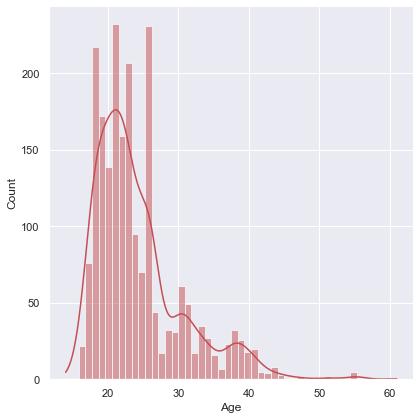

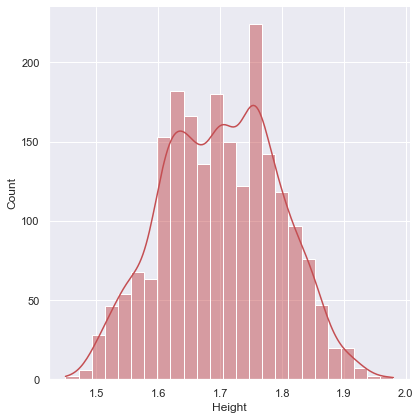

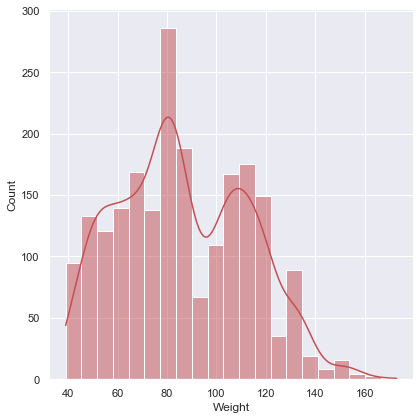

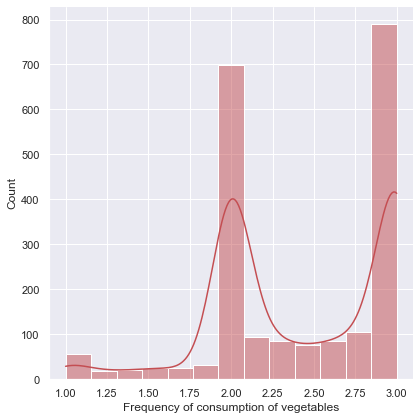

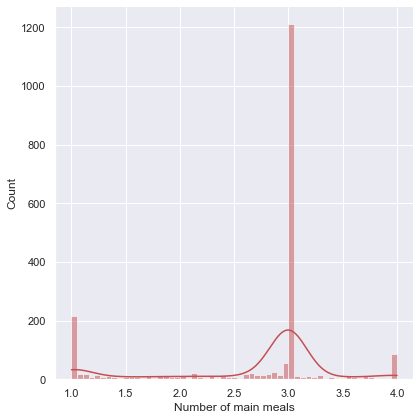

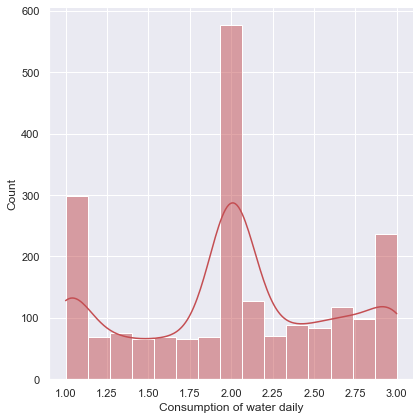

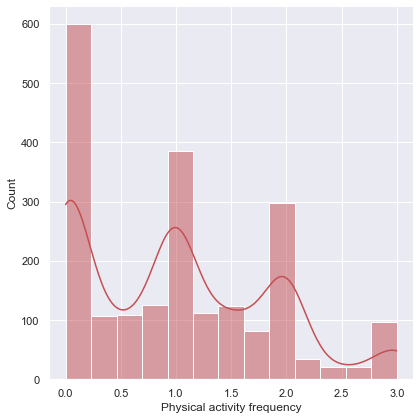

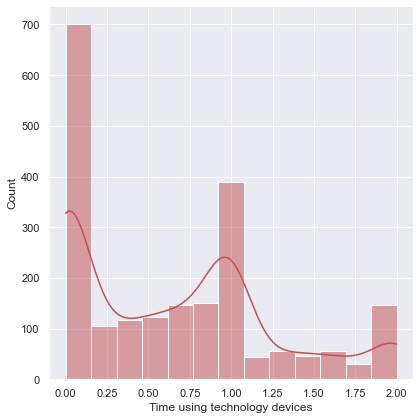

In [28]:
for i in data.select_dtypes('double'):
    ax=sns.displot(data[i], kind="hist", kde=True,  height=6, color='r')

In [29]:
data.select_dtypes('object')

,Gender,family_history_with_overweight,Frequent consumption of high caloric food,Consumption of food between meals,Smoke,Calories consumption monitoring,Consumption of alcohol,Transportation used,Obesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


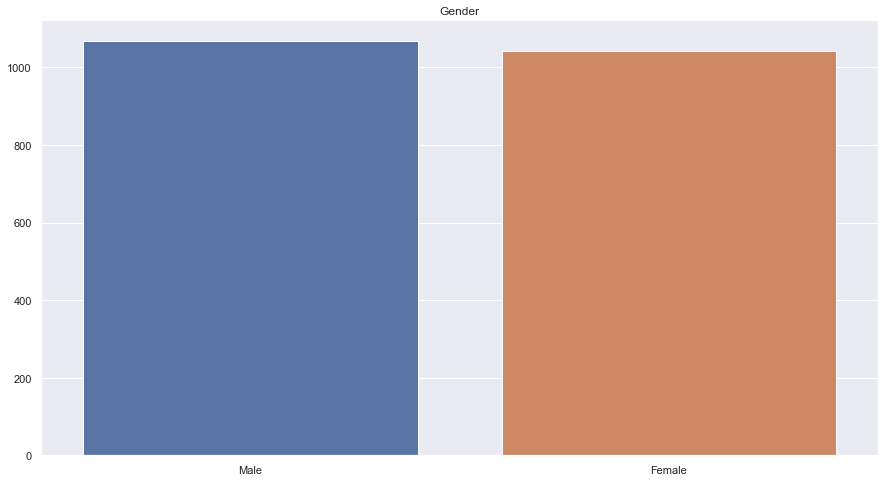

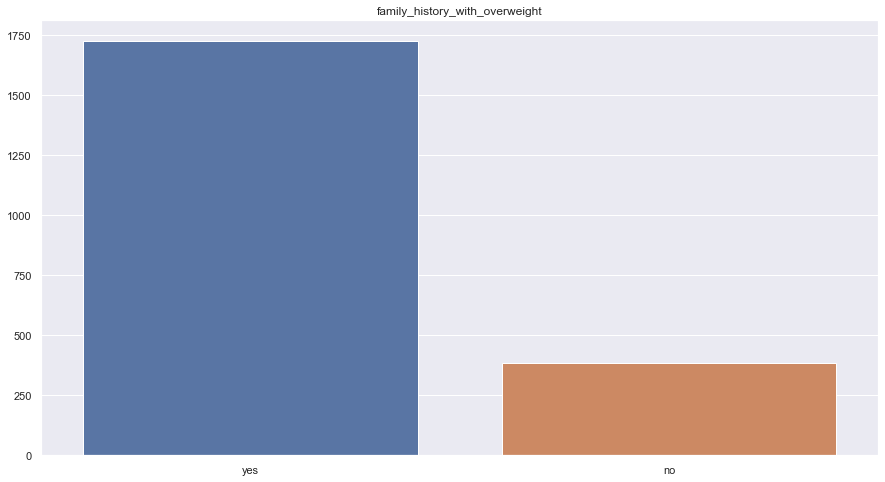

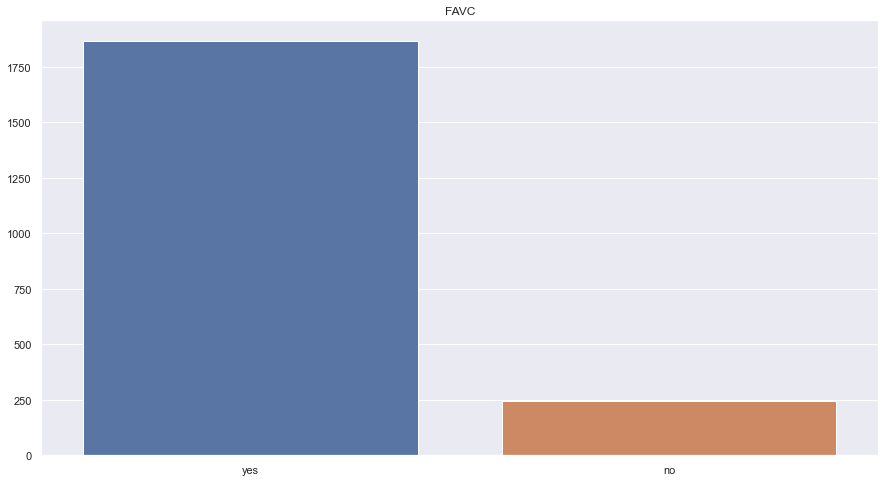

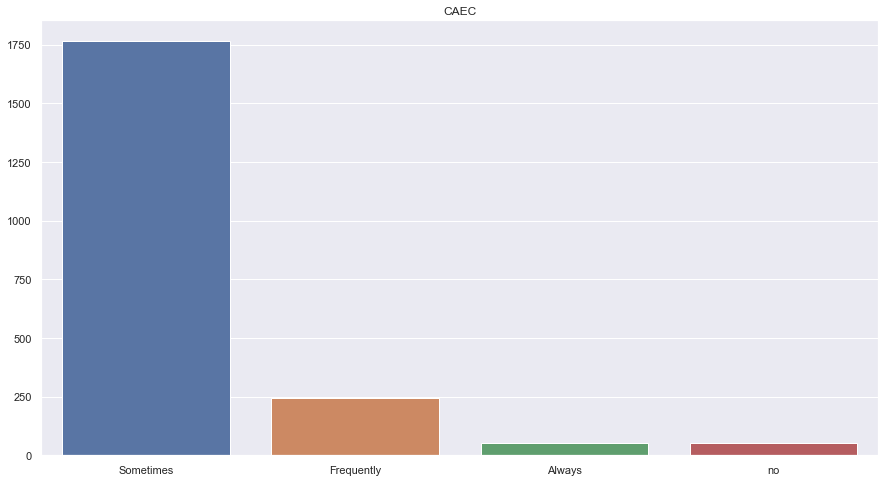

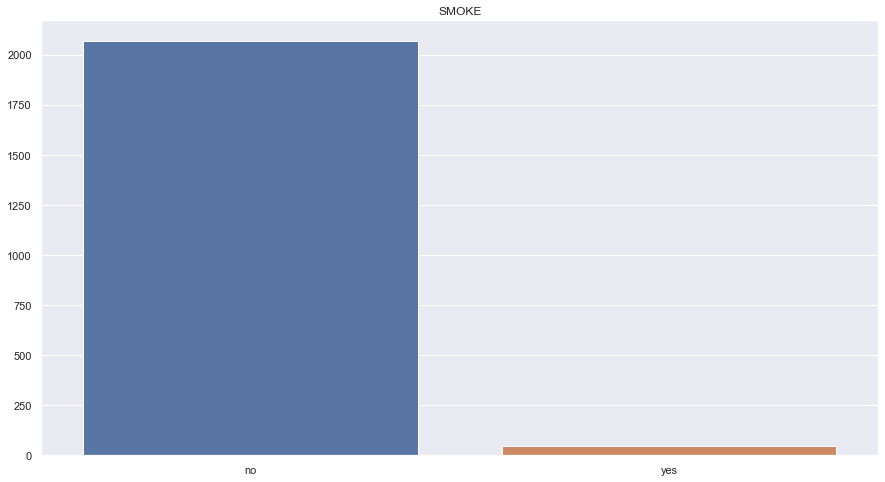

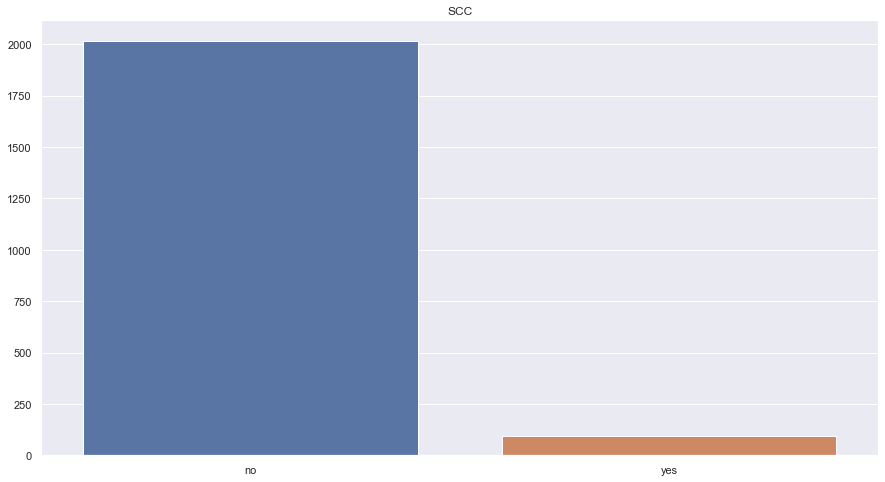

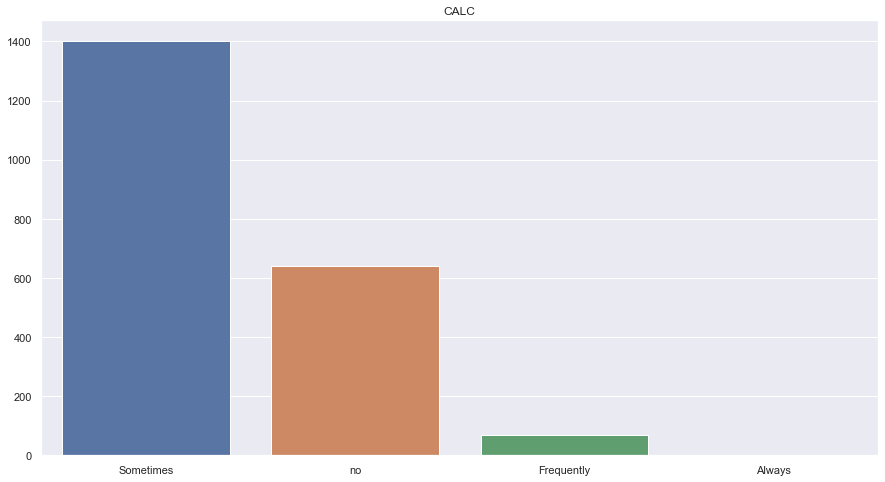

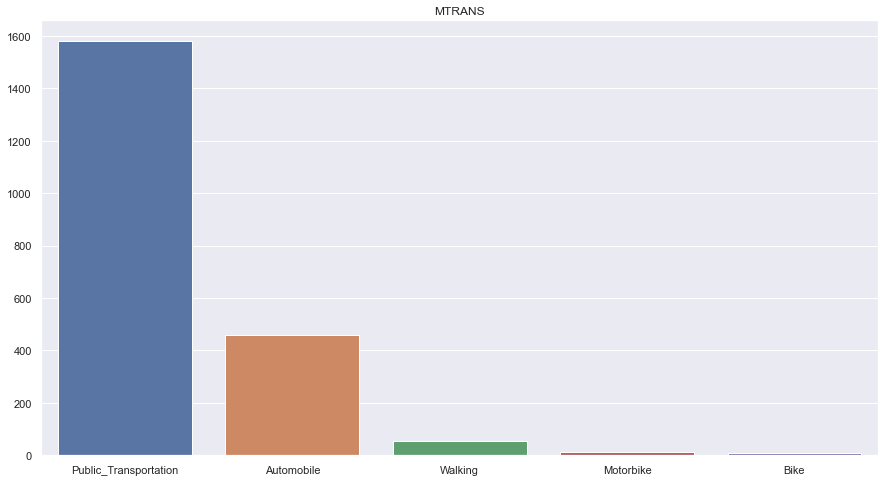

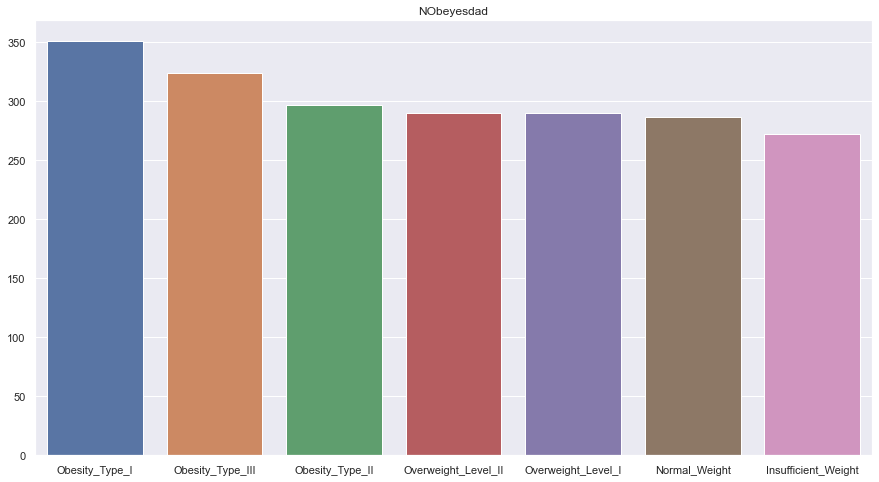

In [57]:
for i in df.select_dtypes('object'):    
    plt.figure(figsize=(15,8))
    plt.title(i)    
    ax = sns.barplot(x = df[i].value_counts().index.to_list(), y = df[i].value_counts().to_list())    


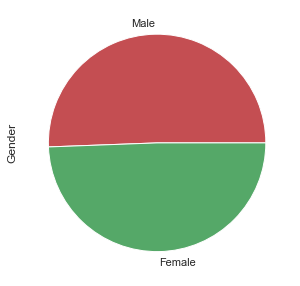

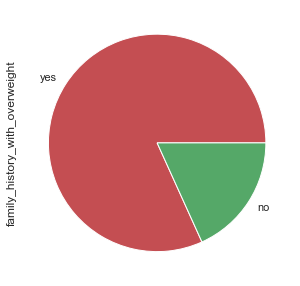

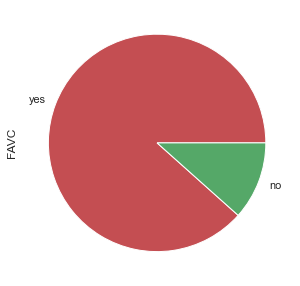

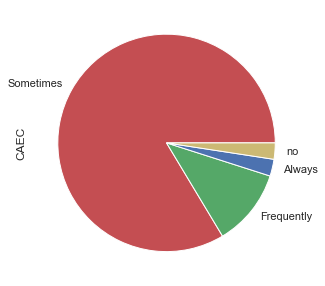

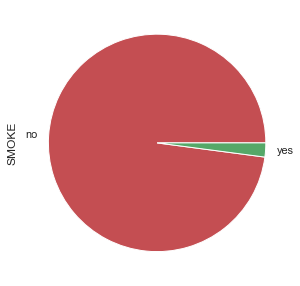

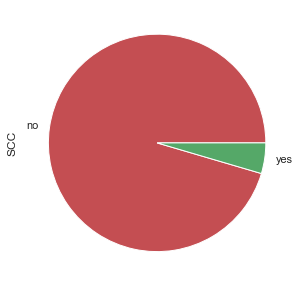

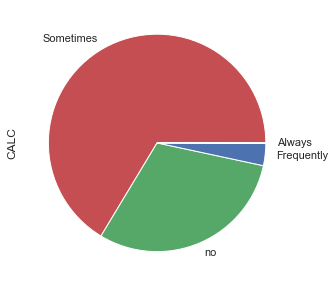

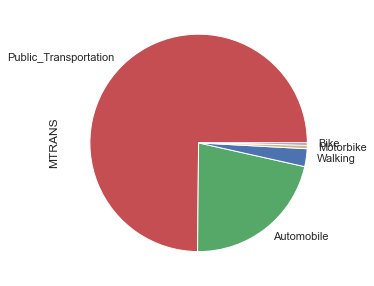

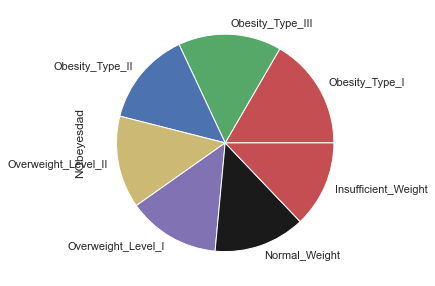

In [32]:
for i in df.select_dtypes('object'):
    fig=plt.figure(figsize=(5,5))
    ax=df[i].value_counts().plot.pie(colors='rgbymk')